In [ ]:
!pip install fuzzymatcher

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import os
import csv
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from ipykernel import kernelapp as app
#import fuzzymatcher
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import ARMA as arma
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA as arima
from statsmodels.tsa.arima_model import ARIMAResults as arima_results
from statsmodels.tsa.stattools import adfuller
import math
from math import sqrt
#from uszipcode import SearchEngine as zse
from pandas.plotting import autocorrelation_plot as acp
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url1 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/strains_us.csv'
url2 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/maskdata.csv'
url3 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/country_vaccinations_by_manufacturer.csv'
url4 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/owid_us.csv'

strain = pd.read_csv(url1).fillna(0)
mask = pd.read_csv(url2)
vacsmanf = pd.read_csv(url3)
owidus = pd.read_csv(url4)

In [ ]:
strplt = strain.drop(columns=["Unnamed: 0", "Date", "CountryCode", "Population"])

x = strplt[['CountryName']]

y =  strplt.loc[:, 'prevalence_rolling_b.1':'prevalence_gaussian10_b.1.1']

plt.scatter(x,y)
plt.show()

In [ ]:
strain

,Unnamed: 0,Date,CountryCode,CountryName,Population,prevalence_rolling_b.1,prevalence_rolling14_b.1,prevalence_gaussian5_b.1,prevalence_gaussian10_b.1,prevalence_rolling_b.1.1.519,prevalence_rolling14_b.1.1.519,prevalence_gaussian5_b.1.1.519,prevalence_gaussian10_b.1.1.519,prevalence_rolling_b.1.1.7,prevalence_rolling14_b.1.1.7,prevalence_gaussian5_b.1.1.7,prevalence_gaussian10_b.1.1.7,prevalence_rolling_b.1.2,prevalence_rolling14_b.1.2,prevalence_gaussian5_b.1.2,prevalence_gaussian10_b.1.2,prevalence_rolling_b.1.427,prevalence_rolling14_b.1.427,prevalence_gaussian5_b.1.427,prevalence_gaussian10_b.1.427,prevalence_rolling_b.1.526,prevalence_rolling14_b.1.526,prevalence_gaussian5_b.1.526,prevalence_gaussian10_b.1.526,prevalence_rolling_b.1.617.2,prevalence_rolling14_b.1.617.2,prevalence_gaussian5_b.1.617.2,prevalence_gaussian10_b.1.617.2,prevalence_rolling_b.1.621,prevalence_rolling14_b.1.621,prevalence_gaussian5_b.1.621,prevalence_gaussian10_b.1.621,prevalence_rolling_c.2.1,prevalence_rolling14_c.2.1,prevalence_gaussian5_c.2.1,prevalence_gaussian10_c.2.1,prevalence_rolling_other,prevalence_rolling14_other,prevalence_gaussian5_other,prevalence_gaussian10_other,prevalence_rolling_p.1,prevalence_rolling14_p.1,prevalence_gaussian5_p.1,prevalence_gaussian10_p.1,prevalence_rolling_b.1.1,prevalence_rolling14_b.1.1,prevalence_gaussian5_b.1.1,prevalence_gaussian10_b.1.1
0,92554,1/1/2020,USA,United States,331002647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000009,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000789,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,92555,1/2/2020,USA,United States,331002647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000013,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000861,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,92556,1/3/2020,USA,United States,331002647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000020,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001011,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,92557,1/4/2020,USA,United States,331002647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000032,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001244,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,92558,1/5/2020,USA,United States,331002647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000049,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001574,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,93150,8/19/2021,USA,United States,331002647,0.0,0.000004,0.000031,0.000122,0.0,0.0,0.0,0.0,0.0,0.001743,0.002681,0.005399,0.0,0.0,0.000022,0.000133,0.0,0.0,1.710000e-06,0.000012,0.0,0.0,0.000009,0.000106,0.0,0.435968,0.446971,0.496198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041310,0.043858,0.052604,0.0,0.001369,0.001792,0.003318,0.0,0.000131,0.000126,0.000129
597,93151,8/20/2021,USA,United States,331002647,0.0,0.000000,0.000023,0.000112,0.0,0.0,0.0,0.0,0.0,0.001426,0.002364,0.005099,0.0,0.0,0.000015,0.000121,0.0,0.0,1.160000e-06,0.000010,0.0,0.0,0.000006,0.000093,0.0,0.391546,0.429742,0

In [ ]:
strplt = strain.drop(columns=["Unnamed: 0", "CountryCode", "Population"])
strplt = pd.melt(strplt, id_vars=['Date', 'CountryName'])
strplt['variable'] = strplt['variable'].str.replace('prevalence_', '')
strplt[['metric', 'strain']] = strplt['variable'].str.split('_', expand = True)
strplt = strplt.drop(columns = ['variable'])
strplt = strplt.dropna()
strplt['Date'] = pd.to_datetime(strplt['Date'])
strplt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28848 entries, 0 to 28847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         28848 non-null  datetime64[ns]
 1   CountryName  28848 non-null  object        
 2   value        28848 non-null  float64       
 3   metric       28848 non-null  object        
 4   strain       28848 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.3+ MB


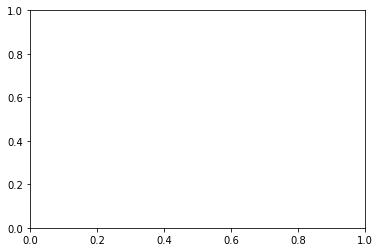

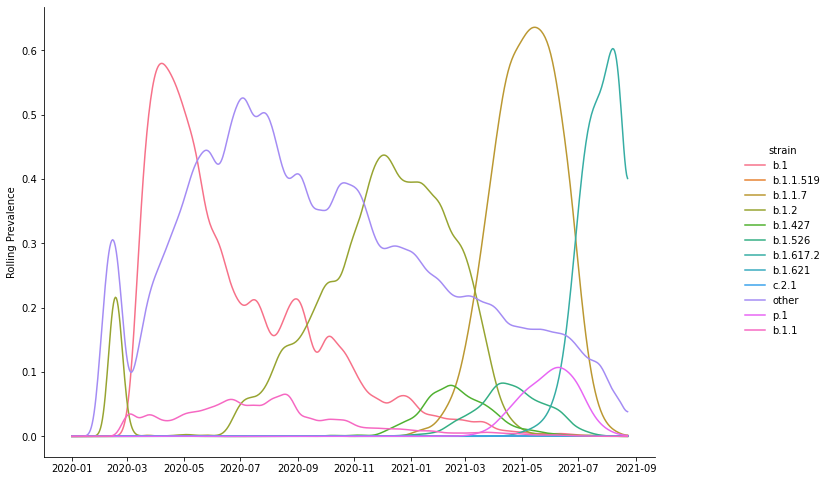

In [ ]:
strains = ['b.1.1.7', 'b.1.351', 'b.1.617.2']
strplt_rolling = strplt[strplt['metric']=='gaussian5']
ax = plt.subplots()   #  added to make the plot run
g = sns.relplot(x="Date", y="value", hue="strain", kind="line", data=strplt_rolling, ax = ax)
g.set(xlabel = '', ylabel = 'Rolling Prevalence')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mergedf = pd.read_csv('mergedf.csv')

In [ ]:

X = mergedf.iloc[:, 29].values
y = mergedf.iloc[:, 26].values

# define variables from the dataset
#deaths_X, deaths_y = test_train_split(mergedf)

# Use only one feature
deaths_X = X
deaths_y = y

# Split the data into training/testing sets
deaths_X_train = deaths_X[:-70000]
deaths_X_test = deaths_X[-70000:]

# Split the targets into training/testing sets
deaths_y_train = deaths_y[:-70000]
deaths_y_test = deaths_y[-70000:]


FileNotFoundError: ignored

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(deaths_X_train, deaths_y_train)

# Make predictions using the testing set
deaths_y_pred = regr.predict(deaths_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(deaths_y_test, deaths_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(deaths_y_test, deaths_y_pred))

# Plot outputs
plt.scatter(deaths_X_test, deaths_y_test,  color='black')
plt.plot(deaths_X_test, deaths_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()